In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/Data Science/DataTrained/Evaluation_Projects/IBM_HR_Attrition_Rate_Analytics.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null values present in the Dataset.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- EmployeeCount, Over18 and StandardHours are constant variable(All the values in the columns are same) and needed to be dropped.
- EmployeeNumber is a unique variable(All the values in the columns are completely different/ Primary key) and needed to be dropped.

In [8]:
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


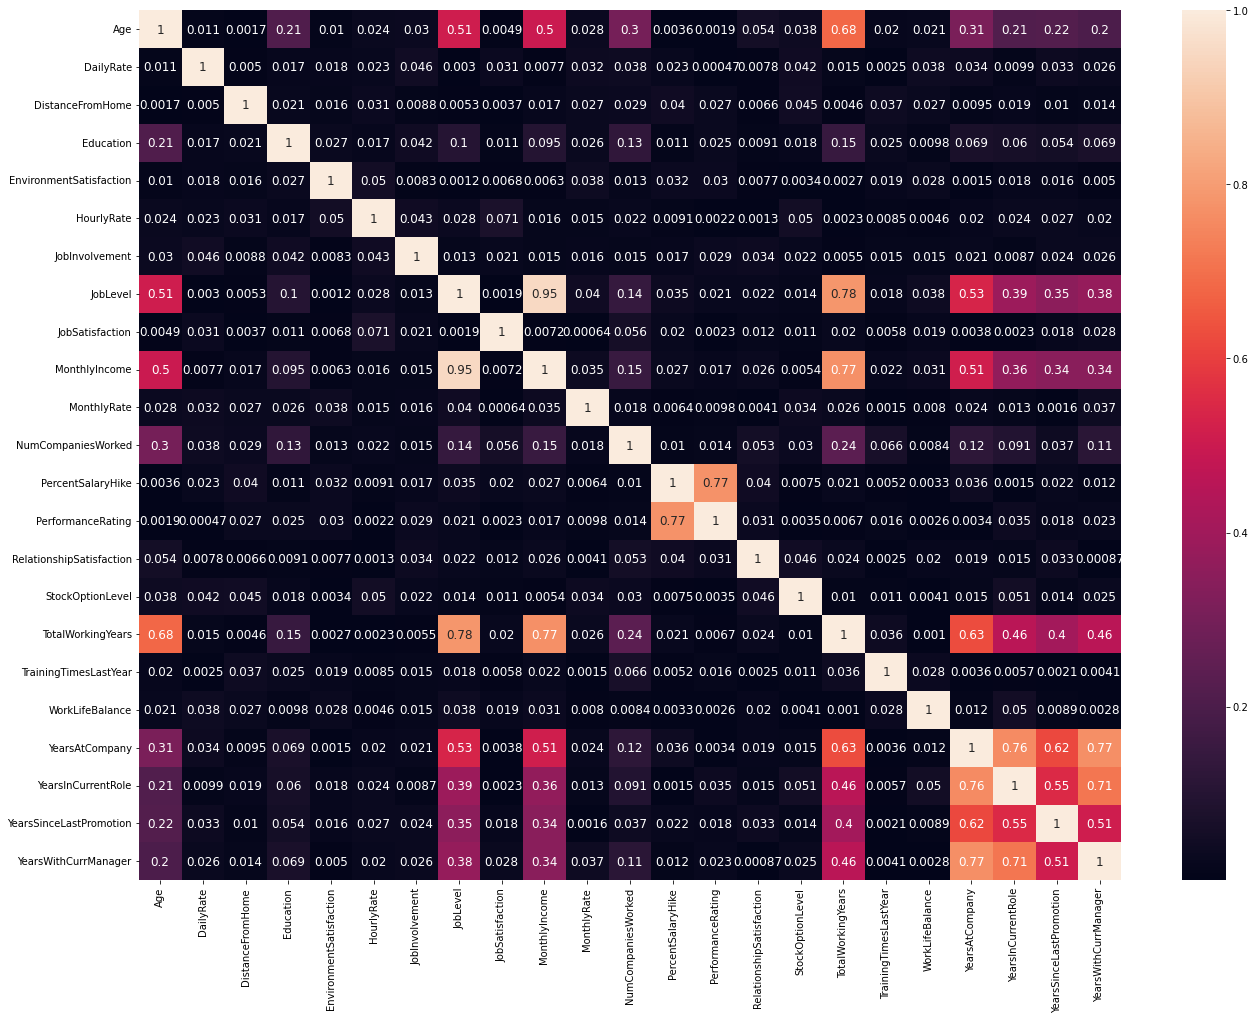

In [9]:
data_corr = data.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

Observations:
1. Monthly Income and Job Level are having strong correlation between them.
2. Job level is having moderate correlation with Total Working Years.
3. All other columns are having moderate to weak correlation amongst them.

We will divide our dataset into two groups (for EDA Purpose Only):
1. Categorical Data
2. Continuous Data

In [10]:
data_cont = data.select_dtypes(exclude = ['object'] )

data_cont

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


Although, for some columns the data type is continuous but they are categorical in nature. Therefore, we will check the number of unique values in each column to identify the true nature of feature.

In [11]:
count = 1
for x in data_cont:
    print(f'{count}. {x}: {data_cont[x].nunique()}')
    print(f'{data_cont[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. Age: 43
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
----------

2. DailyRate: 886
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
----------

3. DistanceFromHome: 29
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64
----------

4. Education: 5
3   

The columns having categorical nature and continuous data types are:

BusinessTravel, Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance, TrainingTimesLastYear

In [12]:
# Categorical Data

data_cat = data.select_dtypes(include = ['object'] )

data_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


### EDA on Continuous Features

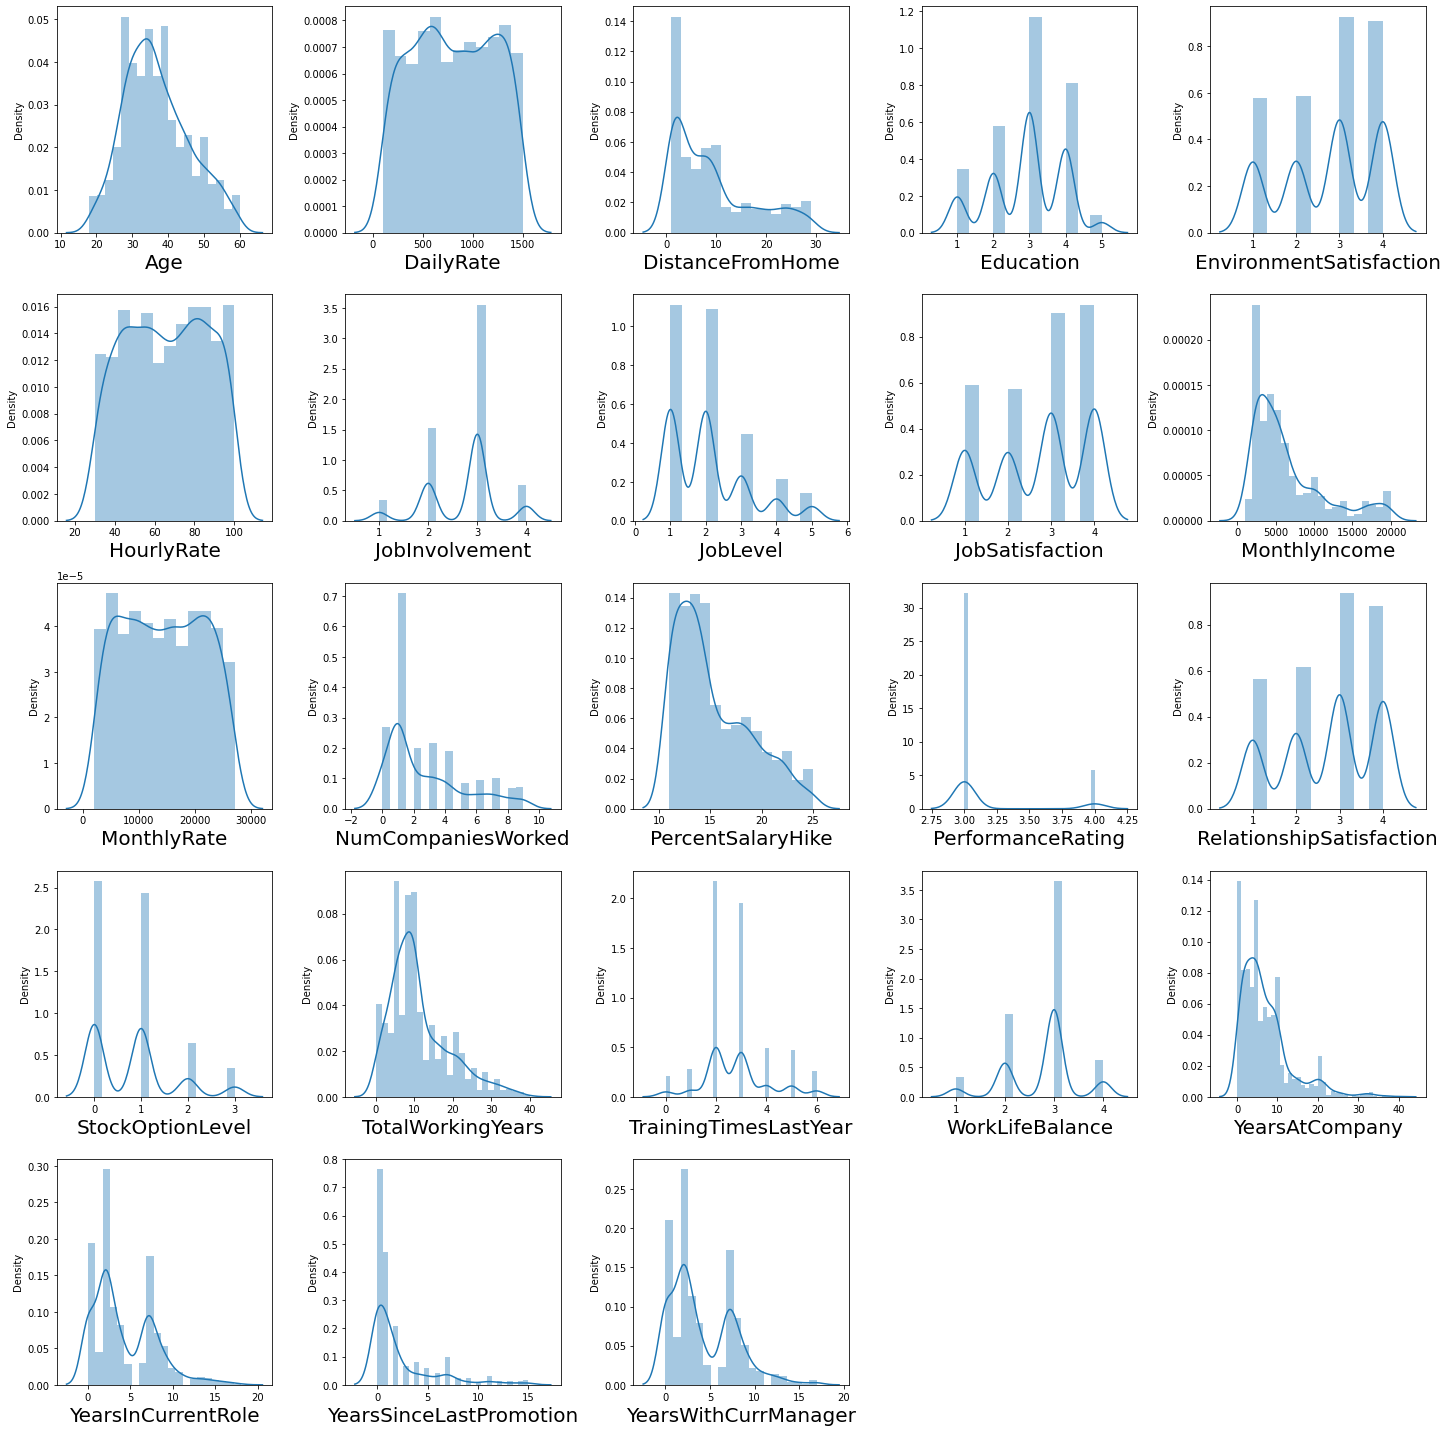

In [13]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in data_cont:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(data_cont[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

We will check for skewness in the dataset as it looks like there is some skewness present in some of the features.

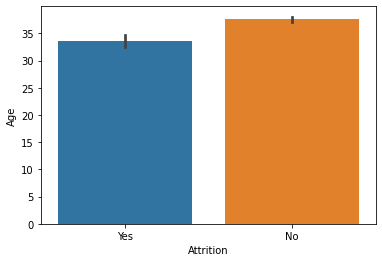

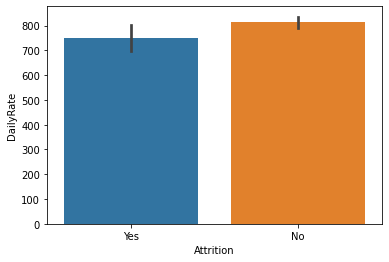

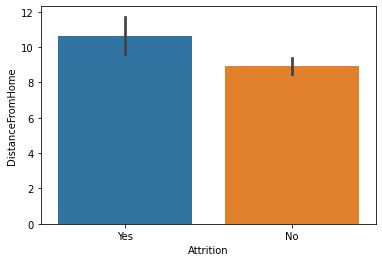

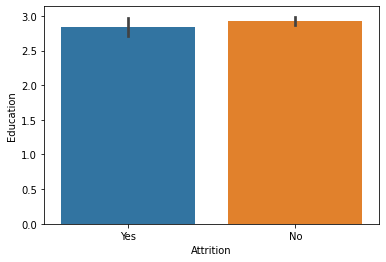

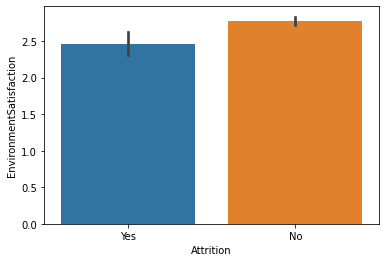

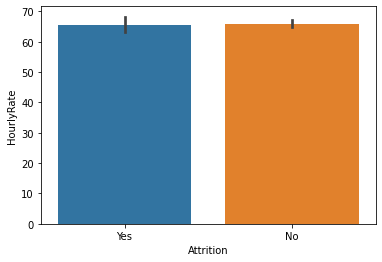

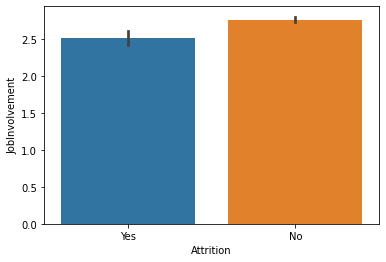

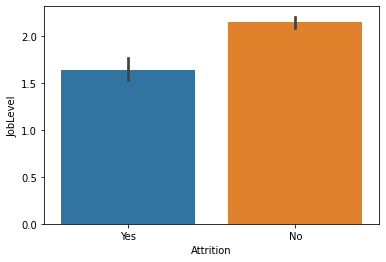

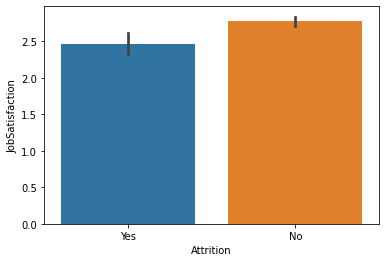

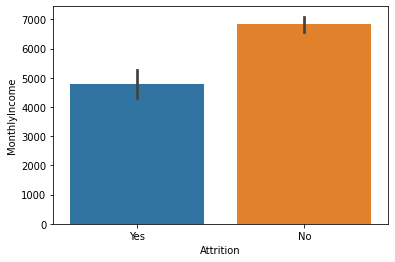

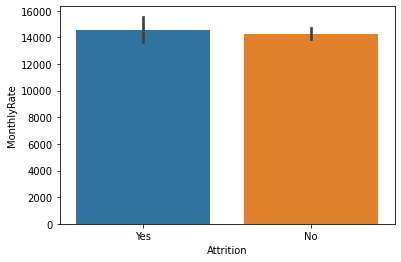

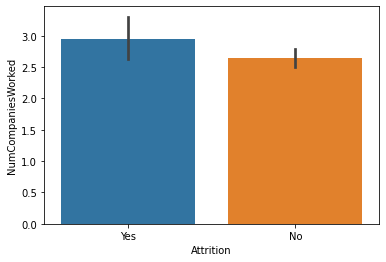

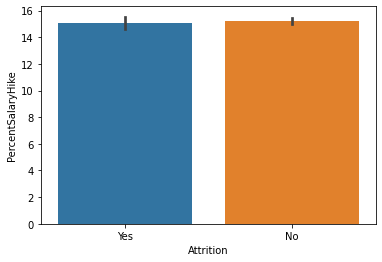

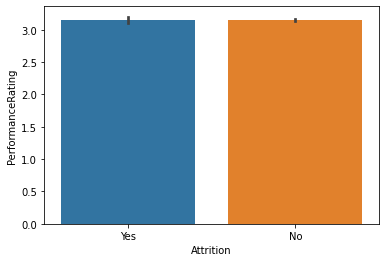

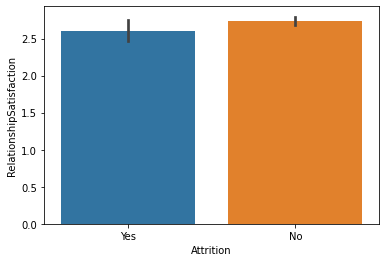

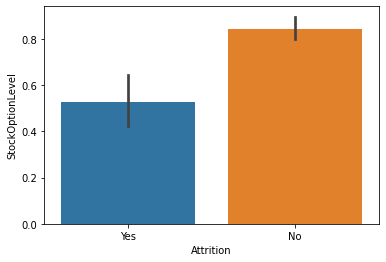

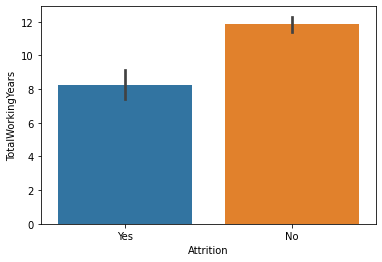

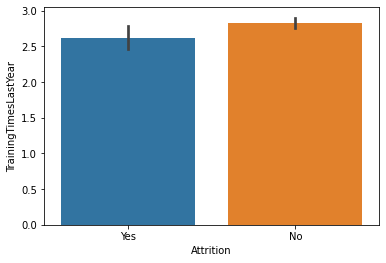

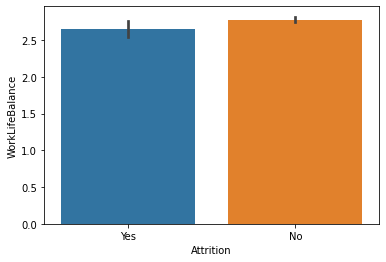

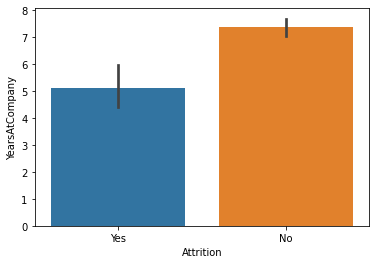

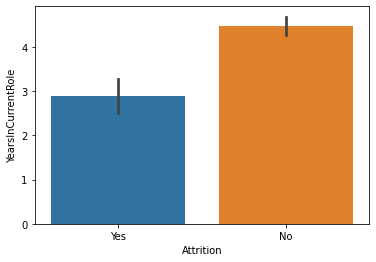

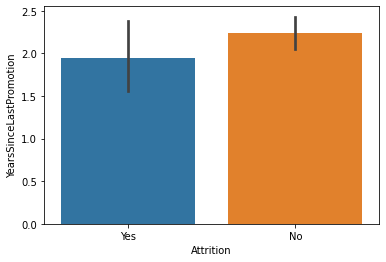

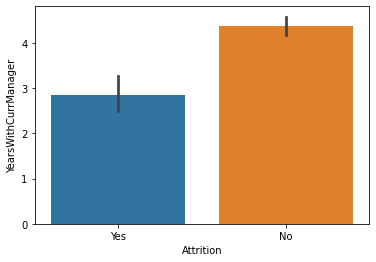

In [14]:
# Bar PLot

for i in data_cont:
    sns.barplot(y = data_cont[i], x = data['Attrition'])
    plt.show()

### EDA on Categorical Features

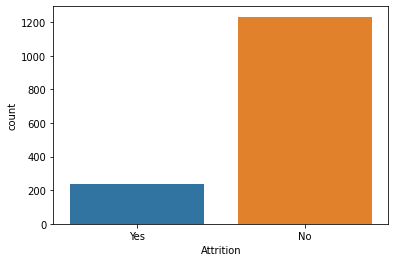

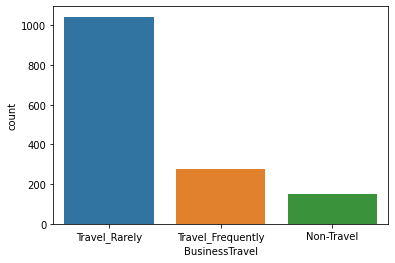

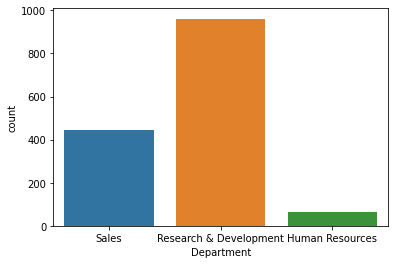

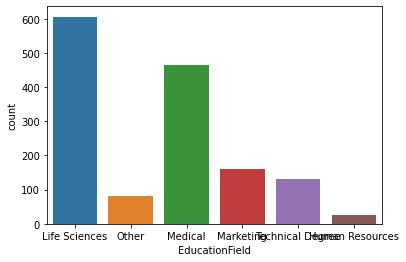

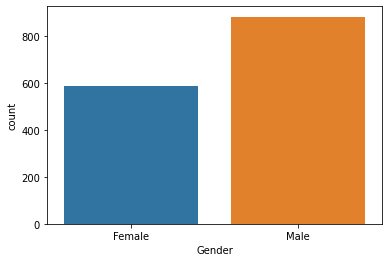

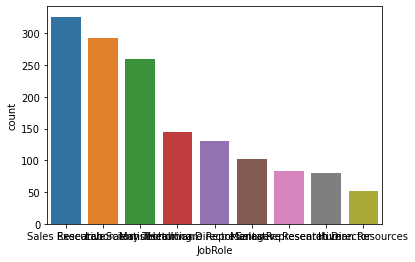

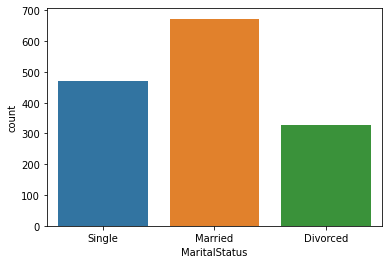

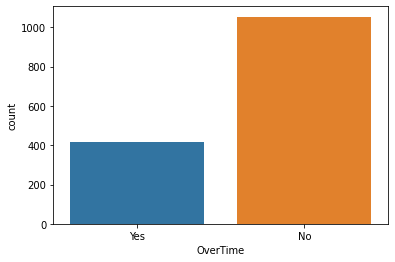

In [15]:
for i in data_cat:
    sns.countplot(x = data_cat[i])
    plt.show()

In [16]:
# Count values of different values for each variables.
for i in data_cat:
    print(data_cat[i].value_counts(), end = '\n---------\n\n')

No     1233
Yes     237
Name: Attrition, dtype: int64
---------

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---------

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---------

Male      882
Female    588
Name: Gender, dtype: int64
---------

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
---------

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
-----

#### Transforming Categorical Features

In [17]:
x = data.drop('Attrition', axis=1)
y = data.Attrition

In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

In [19]:
dum_BusinessTravel = pd.get_dummies(data['BusinessTravel'],
                                    prefix ='BusinessTravel')
dum_Department = pd.get_dummies(data['Department'],
                                prefix ='Department')
dum_EducationField = pd.get_dummies(data['EducationField'],
                                    prefix ='EducationField')
dum_Gender = pd.get_dummies(data['Gender'],
                            prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(data['JobRole'],
                             prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(data['MaritalStatus'],
                                   prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(data['OverTime'],
                              prefix ='OverTime', drop_first = True)
# Adding these dummy variable to input X
X = pd.concat([x, dum_BusinessTravel, dum_Department,
               dum_EducationField, dum_Gender, dum_JobRole,
               dum_MaritalStatus, dum_OverTime], axis = 1)
# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField',
        'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
        axis = 1, inplace = True)
 
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [20]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,1,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,1,0,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,0,1,0,0


In [21]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_L

Some values in the columns are having special characters, which are to be replaced by "_" (underscore).

In [22]:
X.rename(columns = {'BusinessTravel_Non-Travel':'BusinessTravel_Non_Travel', 
                    'Department_Human Resources':'Department_Human_Resources',
                    'Department_Research & Development':'Department_Research_and_Development',
                    'EducationField_Human Resources':'EducationField_Human_Resources',
                    'EducationField_Life Sciences':'EducationField_Life_Sciences',
                    'EducationField_Technical Degree':'EducationField_Technical_Degree',
                    'JobRole_Healthcare Representative':'JobRole_Healthcare_Representative',
                    'JobRole_Human Resources':'JobRole_Human_Resources',
                    'JobRole_Laboratory Technician':'JobRole_Laboratory_Technician',
                    'JobRole_Manufacturing Director':'JobRole_Manufacturing_Director',
                    'JobRole_Research Director':'JobRole_Research_Director',
                    'JobRole_Research Scientist':'JobRole_Research_Scientist',
                    'JobRole_Sales Executive':'JobRole_Sales_Executive',
                    'JobRole_Sales Representative':'JobRole_Sales_Representative'}, inplace = True)

X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non_Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human_Resources',
       'Department_Research_and_Development', 'Department_Sales',
       'EducationField_Human_Resources', 'EducationField_Life_Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical_Degree',
       'Gender_Male', 'JobRole_Healthcare_Representative',
       'JobRole_Human_Resources', 'JobRole

Earlier we have seen, that there might be some skewness in the data. Let's detect it now.

In [23]:
# Checking SKewness

X.skew().sort_values(ascending = False)

EducationField_Human_Resources         7.181112
JobRole_Human_Resources                5.035637
Department_Human_Resources             4.518824
JobRole_Research_Director              3.932443
EducationField_Other                   3.875119
JobRole_Sales_Representative           3.847192
JobRole_Manager                        3.392611
JobRole_Healthcare_Representative      2.887251
EducationField_Technical_Degree        2.872604
JobRole_Manufacturing_Director         2.694844
BusinessTravel_Non_Travel              2.632066
EducationField_Marketing               2.525783
YearsSinceLastPromotion                1.984290
PerformanceRating                      1.921883
YearsAtCompany                         1.764529
JobRole_Laboratory_Technician          1.701604
BusinessTravel_Travel_Frequently       1.595067
JobRole_Research_Scientist             1.512214
MonthlyIncome                          1.369817
JobRole_Sales_Executive                1.340834
MaritalStatus_Divorced                 1

We can see the skewness in some columns of our dataset. But the columns having high skewness index are categorical in nature, still we will try to remove the skewness using Power Transformation function.

In [24]:
from sklearn.preprocessing import power_transform

x_new = power_transform(X)

In [25]:
pd.DataFrame(x_new).skew().sort_values(ascending = False)

29    7.181112
37    5.035637
26    4.518824
41    3.932443
33    3.875119
44    3.847192
39    3.392611
36    2.887251
34    2.872604
40    2.694844
23    2.632066
31    2.525783
38    1.701604
24    1.595067
42    1.512214
43    1.340834
45    1.336093
48    0.964489
28    0.856158
32    0.794118
47    0.773874
30    0.356919
21    0.212129
46    0.169484
12    0.116250
7     0.103624
15    0.087019
17    0.058058
9     0.032831
11    0.014814
13    0.000000
2    -0.007468
0    -0.007603
19   -0.008683
16   -0.010653
18   -0.012286
6    -0.020365
20   -0.060849
22   -0.067565
3    -0.099881
5    -0.106461
10   -0.184087
14   -0.193634
1    -0.196160
4    -0.205395
8    -0.212815
35   -0.408665
27   -0.646936
25   -0.923992
dtype: float64

In [26]:
x = pd.DataFrame(x_new, columns = X.columns)

In [27]:
x.skew().sort_values(ascending = False)

EducationField_Human_Resources         7.181112
JobRole_Human_Resources                5.035637
Department_Human_Resources             4.518824
JobRole_Research_Director              3.932443
EducationField_Other                   3.875119
JobRole_Sales_Representative           3.847192
JobRole_Manager                        3.392611
JobRole_Healthcare_Representative      2.887251
EducationField_Technical_Degree        2.872604
JobRole_Manufacturing_Director         2.694844
BusinessTravel_Non_Travel              2.632066
EducationField_Marketing               2.525783
JobRole_Laboratory_Technician          1.701604
BusinessTravel_Travel_Frequently       1.595067
JobRole_Research_Scientist             1.512214
JobRole_Sales_Executive                1.340834
MaritalStatus_Divorced                 1.336093
OverTime_Yes                           0.964489
Department_Sales                       0.856158
EducationField_Medical                 0.794118
MaritalStatus_Single                   0

There is no change in the skewness values, which clearly means that skewness values are of categorical features.

### Checking Outliers

As there are 49 columns in the dataset, it is not possible to plot each and every column seperately or plot all together also. so we will print it in 2 steps.

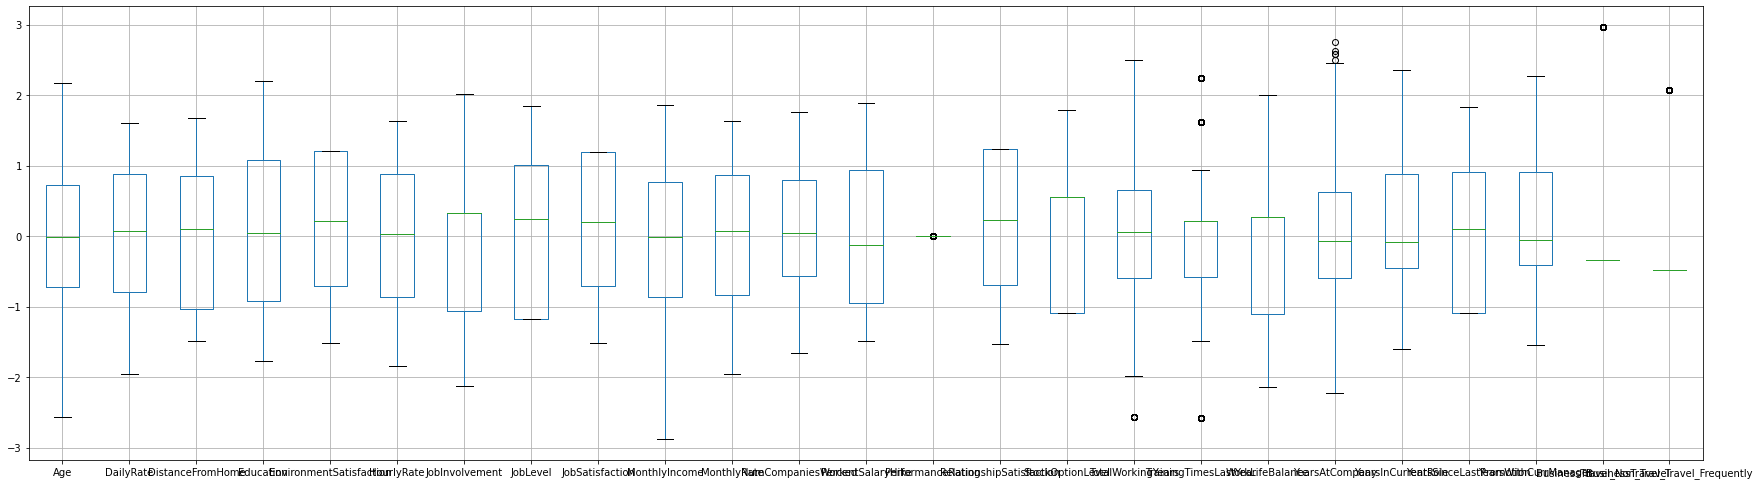

In [28]:
# checking Outliers

x.iloc[:,0:25].boxplot(figsize = (30,10))
plt.subplots_adjust(bottom = 0.25)
plt.show()

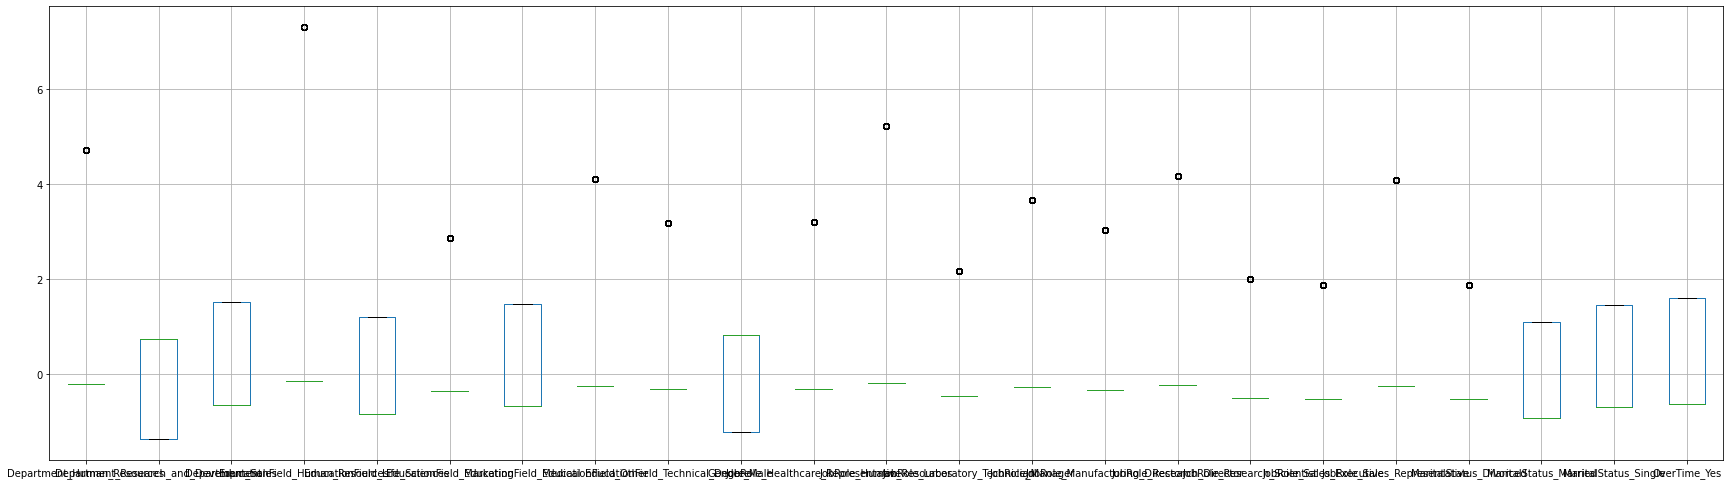

In [29]:
# checking Outliers

x.iloc[:,26:].boxplot(figsize = (30,10))
plt.subplots_adjust(bottom = 0.25)
plt.show()

In [30]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

Age                                     True
DailyRate                               True
DistanceFromHome                        True
Education                               True
EnvironmentSatisfaction                 True
HourlyRate                              True
JobInvolvement                          True
JobLevel                                True
JobSatisfaction                         True
MonthlyIncome                           True
MonthlyRate                             True
NumCompaniesWorked                      True
PercentSalaryHike                       True
PerformanceRating                       True
RelationshipSatisfaction                True
StockOptionLevel                        True
TotalWorkingYears                       True
TrainingTimesLastYear                   True
WorkLifeBalance                         True
YearsAtCompany                          True
YearsInCurrentRole                      True
YearsSinceLastPromotion                 True
YearsWithC

There are multiple columns with outlier values more than ZSCORE - 3.

In [31]:
z = np.abs(zscore(x))
threshold = 3
index = np.where(z>3)

In [32]:
index

(array([   2,    8,    9,   15,   18,   20,   20,   21,   22,   25,   25,
          28,   29,   31,   31,   33,   33,   36,   37,   40,   45,   45,
          51,   53,   55,   59,   60,   62,   64,   64,   65,   66,   75,
          77,   77,   78,   79,   79,   84,   85,   86,   86,   88,   90,
          93,   95,   95,   96,  100,  100,  100,  103,  104,  105,  105,
         105,  106,  110,  112,  112,  112,  116,  117,  119,  123,  125,
         126,  127,  128,  129,  134,  134,  135,  136,  139,  139,  139,
         142,  145,  147,  152,  155,  155,  156,  159,  163,  165,  170,
         171,  171,  182,  184,  186,  187,  188,  189,  190,  192,  194,
         197,  198,  199,  199,  200,  200,  201,  204,  208,  209,  211,
         213,  214,  215,  217,  222,  222,  224,  226,  231,  231,  232,
         232,  233,  235,  237,  238,  243,  244,  244,  245,  247,  249,
         250,  251,  251,  255,  257,  262,  263,  263,  266,  267,  268,
         270,  271,  275,  276,  278, 

In [33]:
x_new = x[(z<3).all(axis=1)]

x_new

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.522140,0.759289,-1.494085,-0.916940,-0.706596,1.354630,0.326033,0.241622,1.192743,0.285965,...,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,1.591746
1,1.276411,-1.334597,0.243416,-1.771185,0.208597,-0.210675,-1.058710,0.241622,-0.709062,0.052833,...,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.628241
3,-0.353971,1.379936,-0.700347,1.082871,1.209516,-0.460197,0.326033,-1.170135,0.197856,-0.863050,...,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,1.591746
4,-1.123755,-0.453941,-1.031215,-1.771185,-1.518118,-1.289301,0.326033,-1.170135,-0.709062,-0.567909,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.628241
5,-0.474486,0.542641,-1.031215,-0.916940,1.209516,0.658558,0.326033,-1.170135,1.192743,-0.772577,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1.363928,-0.944108,1.634493,0.040522,1.209516,-1.342967,-1.058710,1.009822,-1.509980,1.111638,...,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.869602,-0.918921,-0.685565,1.591746
1462,0.316210,-0.123445,1.456094,-1.771185,-0.706596,-0.260266,-1.058710,1.500164,1.192743,1.244888,...,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,-0.628241
1465,-0.008279,0.264672,1.407126,-0.916940,0.208597,-1.235882,2.014107,0.241622,1.192743,-1.076843,...,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-0.628241
1468,1.276411,0.583235,-1.031215,0.040522,1.209516,-0.111945,-1.058710,0.241622,-0.709062,0.127762,...,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565,-0.628241


In [34]:
x_new.shape

(748, 49)

In [35]:
# Percentage Loss of Data

Data_loss = ((1470-748)/1470)*100

Data_loss

49.1156462585034

After Removal of Outliers, The dataset has been reduced to 748 rows, which means almost 50% of data.

Therefore, we will not remove the outliers, but instead we will keep it for model building.

In [36]:
x.shape

(1470, 49)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,2.128777,Age
1,1.034245,DailyRate
2,1.026635,DistanceFromHome
3,1.088280,Education
4,1.035278,EnvironmentSatisfaction
5,1.028618,HourlyRate
6,1.029914,JobInvolvement
7,8.452310,JobLevel
8,1.025311,JobSatisfaction
9,7.719965,MonthlyIncome


The infinite values in VIF are because of categorical data, which are having correlation with each other. Other than this, all other VIF values are less than 10, so we can proceed ahead considering, there is no mulitcollinearity present in the dataset.

# Model Building

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [40]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier()]

for rs in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = rs)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', i)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = i
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Accuracy score 0.875 random_state 1 Model LogisticRegression()
Accuracy score 0.8288043478260869 random_state 1 Model RandomForestClassifier()
Accuracy score 0.7853260869565217 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.8016304347826086 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.8315217391304348 random_state 1 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_

Accuracy score 0.8478260869565217 random_state 9 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 9 Model DecisionTreeClassifier()
Accuracy score 0.8478260869565217 random_state 9 Model KNeighborsClassifier()
Accuracy score 0.8641304347826086 random_state 9 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy

Accuracy score 0.842391304347826 random_state 17 Model RandomForestClassifier()
Accuracy score 0.7853260869565217 random_state 17 Model DecisionTreeClassifier()
Accuracy score 0.8478260869565217 random_state 17 Model KNeighborsClassifier()
Accuracy score 0.845108695652174 random_state 17 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accura

Accuracy score 0.8559782608695652 random_state 25 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 25 Model DecisionTreeClassifier()
Accuracy score 0.8641304347826086 random_state 25 Model KNeighborsClassifier()
Accuracy score 0.8695652173913043 random_state 25 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.7880434782608695 random_state 33 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 33 Model KNeighborsClassifier()
Accuracy score 0.8695652173913043 random_state 33 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8695652173913043 random_state 34 Model LogisticRegression()
Accuracy

Accuracy score 0.8777173913043478 random_state 41 Model RandomForestClassifier()
Accuracy score 0.8016304347826086 random_state 41 Model DecisionTreeClassifier()
Accuracy score 0.8695652173913043 random_state 41 Model KNeighborsClassifier()
Accuracy score 0.8695652173913043 random_state 41 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8369565217391305 random_state 49 Model RandomForestClassifier()
Accuracy score 0.8152173913043478 random_state 49 Model DecisionTreeClassifier()
Accuracy score 0.8342391304347826 random_state 49 Model KNeighborsClassifier()
Accuracy score 0.8478260869565217 random_state 49 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8695652173913043 random_state 57 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 57 Model DecisionTreeClassifier()
Accuracy score 0.8695652173913043 random_state 57 Model KNeighborsClassifier()
Accuracy score 0.8831521739130435 random_state 57 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8614130434782609 random_state 65 Model RandomForestClassifier()
Accuracy score 0.7581521739130435 random_state 65 Model DecisionTreeClassifier()
Accuracy score 0.8668478260869565 random_state 65 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 65 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8913043478260869 random_state 73 Model RandomForestClassifier()
Accuracy score 0.7934782608695652 random_state 73 Model DecisionTreeClassifier()
Accuracy score 0.8722826086956522 random_state 73 Model KNeighborsClassifier()
Accuracy score 0.8885869565217391 random_state 73 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8641304347826086 random_state 81 Model RandomForestClassifier()
Accuracy score 0.7961956521739131 random_state 81 Model DecisionTreeClassifier()
Accuracy score 0.8695652173913043 random_state 81 Model KNeighborsClassifier()
Accuracy score 0.8831521739130435 random_state 81 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8532608695652174 random_state 89 Model RandomForestClassifier()
Accuracy score 0.7635869565217391 random_state 89 Model DecisionTreeClassifier()
Accuracy score 0.8369565217391305 random_state 89 Model KNeighborsClassifier()
Accuracy score 0.8614130434782609 random_state 89 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8260869565217391 random_state 97 Model RandomForestClassifier()
Accuracy score 0.7907608695652174 random_state 97 Model DecisionTreeClassifier()
Accuracy score 0.8206521739130435 random_state 97 Model KNeighborsClassifier()
Accuracy score 0.8342391304347826 random_state 97 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8315217391304348 random_state 105 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 105 Model DecisionTreeClassifier()
Accuracy score 0.8260869565217391 random_state 105 Model KNeighborsClassifier()
Accuracy score 0.8505434782608695 random_state 105 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8967391304347826 random_state 113 Model RandomForestClassifier()
Accuracy score 0.8152173913043478 random_state 113 Model DecisionTreeClassifier()
Accuracy score 0.8804347826086957 random_state 113 Model KNeighborsClassifier()
Accuracy score 0.875 random_state 113 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8586956521739131 random_state 121 Model RandomForestClassifier()
Accuracy score 0.7934782608695652 random_state 121 Model DecisionTreeClassifier()
Accuracy score 0.8532608695652174 random_state 121 Model KNeighborsClassifier()
Accuracy score 0.8586956521739131 random_state 121 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8722826086956522 random_state 129 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 129 Model DecisionTreeClassifier()
Accuracy score 0.8777173913043478 random_state 129 Model KNeighborsClassifier()
Accuracy score 0.8695652173913043 random_state 129 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8532608695652174 random_state 137 Model RandomForestClassifier()
Accuracy score 0.7690217391304348 random_state 137 Model DecisionTreeClassifier()
Accuracy score 0.845108695652174 random_state 137 Model KNeighborsClassifier()
Accuracy score 0.8505434782608695 random_state 137 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8722826086956522 random_state 145 Model RandomForestClassifier()
Accuracy score 0.7690217391304348 random_state 145 Model DecisionTreeClassifier()
Accuracy score 0.8559782608695652 random_state 145 Model KNeighborsClassifier()
Accuracy score 0.8858695652173914 random_state 145 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8831521739130435 random_state 153 Model RandomForestClassifier()
Accuracy score 0.8070652173913043 random_state 153 Model DecisionTreeClassifier()
Accuracy score 0.8831521739130435 random_state 153 Model KNeighborsClassifier()
Accuracy score 0.9021739130434783 random_state 153 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.875 random_state 161 Model RandomForestClassifier()
Accuracy score 0.8070652173913043 random_state 161 Model DecisionTreeClassifier()
Accuracy score 0.8804347826086957 random_state 161 Model KNeighborsClassifier()
Accuracy score 0.8614130434782609 random_state 161 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8586956521739131 random_state 169 Model RandomForestClassifier()
Accuracy score 0.7717391304347826 random_state 169 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 169 Model KNeighborsClassifier()
Accuracy score 0.8478260869565217 random_state 169 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8315217391304348 random_state 177 Model RandomForestClassifier()
Accuracy score 0.7472826086956522 random_state 177 Model DecisionTreeClassifier()
Accuracy score 0.8315217391304348 random_state 177 Model KNeighborsClassifier()
Accuracy score 0.842391304347826 random_state 177 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8586956521739131 random_state 185 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 185 Model DecisionTreeClassifier()
Accuracy score 0.845108695652174 random_state 185 Model KNeighborsClassifier()
Accuracy score 0.8586956521739131 random_state 185 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.8614130434782609 random_state 193 Model RandomForestClassifier()
Accuracy score 0.7853260869565217 random_state 193 Model DecisionTreeClassifier()
Accuracy score 0.8614130434782609 random_state 193 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 193 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8233695652173914 random_state 201 Model RandomForestClassifier()
Accuracy score 0.7907608695652174 random_state 201 Model DecisionTreeClassifier()
Accuracy score 0.8288043478260869 random_state 201 Model KNeighborsClassifier()
Accuracy score 0.8260869565217391 random_state 201 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8641304347826086 random_state 209 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 209 Model DecisionTreeClassifier()
Accuracy score 0.8668478260869565 random_state 209 Model KNeighborsClassifier()
Accuracy score 0.875 random_state 209 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8586956521739131 random_state 217 Model RandomForestClassifier()
Accuracy score 0.7961956521739131 random_state 217 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 217 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 217 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8614130434782609 random_state 225 Model RandomForestClassifier()
Accuracy score 0.7554347826086957 random_state 225 Model DecisionTreeClassifier()
Accuracy score 0.8532608695652174 random_state 225 Model KNeighborsClassifier()
Accuracy score 0.8505434782608695 random_state 225 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8967391304347826 random_state 233 Model RandomForestClassifier()
Accuracy score 0.7771739130434783 random_state 233 Model DecisionTreeClassifier()
Accuracy score 0.8804347826086957 random_state 233 Model KNeighborsClassifier()
Accuracy score 0.8722826086956522 random_state 233 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8260869565217391 random_state 241 Model RandomForestClassifier()
Accuracy score 0.7690217391304348 random_state 241 Model DecisionTreeClassifier()
Accuracy score 0.8179347826086957 random_state 241 Model KNeighborsClassifier()
Accuracy score 0.8288043478260869 random_state 241 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8885869565217391 random_state 249 Model RandomForestClassifier()
Accuracy score 0.7663043478260869 random_state 249 Model DecisionTreeClassifier()
Accuracy score 0.875 random_state 249 Model KNeighborsClassifier()
Accuracy score 0.8804347826086957 random_state 249 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8722826086956522 random_state 257 Model RandomForestClassifier()
Accuracy score 0.8125 random_state 257 Model DecisionTreeClassifier()
Accuracy score 0.8641304347826086 random_state 257 Model KNeighborsClassifier()
Accuracy score 0.8858695652173914 random_state 257 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy sco

Accuracy score 0.8614130434782609 random_state 265 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 265 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 265 Model KNeighborsClassifier()
Accuracy score 0.8777173913043478 random_state 265 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8369565217391305 random_state 273 Model RandomForestClassifier()
Accuracy score 0.7445652173913043 random_state 273 Model DecisionTreeClassifier()
Accuracy score 0.8342391304347826 random_state 273 Model KNeighborsClassifier()
Accuracy score 0.845108695652174 random_state 273 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8885869565217391 random_state 281 Model RandomForestClassifier()
Accuracy score 0.8152173913043478 random_state 281 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 281 Model KNeighborsClassifier()
Accuracy score 0.907608695652174 random_state 281 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8641304347826086 random_state 289 Model RandomForestClassifier()
Accuracy score 0.7853260869565217 random_state 289 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 289 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 289 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8668478260869565 random_state 297 Model RandomForestClassifier()
Accuracy score 0.8097826086956522 random_state 297 Model DecisionTreeClassifier()
Accuracy score 0.8722826086956522 random_state 297 Model KNeighborsClassifier()
Accuracy score 0.8641304347826086 random_state 297 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8315217391304348 random_state 305 Model RandomForestClassifier()
Accuracy score 0.782608695652174 random_state 305 Model DecisionTreeClassifier()
Accuracy score 0.8260869565217391 random_state 305 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 305 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8396739130434783 random_state 313 Model RandomForestClassifier()
Accuracy score 0.7663043478260869 random_state 313 Model DecisionTreeClassifier()
Accuracy score 0.842391304347826 random_state 313 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 313 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8505434782608695 random_state 321 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 321 Model DecisionTreeClassifier()
Accuracy score 0.845108695652174 random_state 321 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 321 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8233695652173914 random_state 329 Model RandomForestClassifier()
Accuracy score 0.7771739130434783 random_state 329 Model DecisionTreeClassifier()
Accuracy score 0.8342391304347826 random_state 329 Model KNeighborsClassifier()
Accuracy score 0.8478260869565217 random_state 329 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8532608695652174 random_state 337 Model RandomForestClassifier()
Accuracy score 0.7907608695652174 random_state 337 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 337 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 337 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8695652173913043 random_state 345 Model RandomForestClassifier()
Accuracy score 0.7961956521739131 random_state 345 Model DecisionTreeClassifier()
Accuracy score 0.8722826086956522 random_state 345 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 345 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8641304347826086 random_state 353 Model RandomForestClassifier()
Accuracy score 0.7880434782608695 random_state 353 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 353 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 353 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8913043478260869 random_state 361 Model RandomForestClassifier()
Accuracy score 0.7934782608695652 random_state 361 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 361 Model KNeighborsClassifier()
Accuracy score 0.8913043478260869 random_state 361 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8722826086956522 random_state 369 Model RandomForestClassifier()
Accuracy score 0.7635869565217391 random_state 369 Model DecisionTreeClassifier()
Accuracy score 0.8614130434782609 random_state 369 Model KNeighborsClassifier()
Accuracy score 0.8695652173913043 random_state 369 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8559782608695652 random_state 377 Model RandomForestClassifier()
Accuracy score 0.782608695652174 random_state 377 Model DecisionTreeClassifier()
Accuracy score 0.8478260869565217 random_state 377 Model KNeighborsClassifier()
Accuracy score 0.8614130434782609 random_state 377 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8777173913043478 random_state 385 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 385 Model DecisionTreeClassifier()
Accuracy score 0.875 random_state 385 Model KNeighborsClassifier()
Accuracy score 0.9021739130434783 random_state 385 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8315217391304348 random_state 393 Model RandomForestClassifier()
Accuracy score 0.75 random_state 393 Model DecisionTreeClassifier()
Accuracy score 0.8342391304347826 random_state 393 Model KNeighborsClassifier()
Accuracy score 0.8505434782608695 random_state 393 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score

Accuracy score 0.8668478260869565 random_state 401 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 401 Model DecisionTreeClassifier()
Accuracy score 0.8614130434782609 random_state 401 Model KNeighborsClassifier()
Accuracy score 0.8831521739130435 random_state 401 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8614130434782609 random_state 409 Model RandomForestClassifier()
Accuracy score 0.7717391304347826 random_state 409 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 409 Model KNeighborsClassifier()
Accuracy score 0.875 random_state 409 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8777173913043478 random_state 417 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 417 Model DecisionTreeClassifier()
Accuracy score 0.8559782608695652 random_state 417 Model KNeighborsClassifier()
Accuracy score 0.8695652173913043 random_state 417 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8532608695652174 random_state 425 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 425 Model DecisionTreeClassifier()
Accuracy score 0.8559782608695652 random_state 425 Model KNeighborsClassifier()
Accuracy score 0.8586956521739131 random_state 425 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.845108695652174 random_state 433 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 433 Model DecisionTreeClassifier()
Accuracy score 0.8478260869565217 random_state 433 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 433 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8641304347826086 random_state 441 Model RandomForestClassifier()
Accuracy score 0.8016304347826086 random_state 441 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 441 Model KNeighborsClassifier()
Accuracy score 0.875 random_state 441 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8559782608695652 random_state 449 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 449 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 449 Model KNeighborsClassifier()
Accuracy score 0.8641304347826086 random_state 449 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8777173913043478 random_state 457 Model RandomForestClassifier()
Accuracy score 0.8016304347826086 random_state 457 Model DecisionTreeClassifier()
Accuracy score 0.8532608695652174 random_state 457 Model KNeighborsClassifier()
Accuracy score 0.8641304347826086 random_state 457 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8396739130434783 random_state 465 Model RandomForestClassifier()
Accuracy score 0.7635869565217391 random_state 465 Model DecisionTreeClassifier()
Accuracy score 0.8233695652173914 random_state 465 Model KNeighborsClassifier()
Accuracy score 0.8369565217391305 random_state 465 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7989130434782609 random_state 473 Model DecisionTreeClassifier()
Accuracy score 0.875 random_state 473 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 473 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8994565217391305 random_state 474 Model LogisticRegression()
Accuracy score 0.

Accuracy score 0.8505434782608695 random_state 481 Model RandomForestClassifier()
Accuracy score 0.7418478260869565 random_state 481 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 481 Model KNeighborsClassifier()
Accuracy score 0.8586956521739131 random_state 481 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8478260869565217 random_state 489 Model RandomForestClassifier()
Accuracy score 0.7690217391304348 random_state 489 Model DecisionTreeClassifier()
Accuracy score 0.8668478260869565 random_state 489 Model KNeighborsClassifier()
Accuracy score 0.8396739130434783 random_state 489 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8586956521739131 random_state 497 Model RandomForestClassifier()
Accuracy score 0.7581521739130435 random_state 497 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 497 Model KNeighborsClassifier()
Accuracy score 0.875 random_state 497 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8695652173913043 random_state 505 Model RandomForestClassifier()
Accuracy score 0.7663043478260869 random_state 505 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 505 Model KNeighborsClassifier()
Accuracy score 0.8559782608695652 random_state 505 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8695652173913043 random_state 513 Model RandomForestClassifier()
Accuracy score 0.8206521739130435 random_state 513 Model DecisionTreeClassifier()
Accuracy score 0.8777173913043478 random_state 513 Model KNeighborsClassifier()
Accuracy score 0.8831521739130435 random_state 513 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8342391304347826 random_state 521 Model RandomForestClassifier()
Accuracy score 0.7608695652173914 random_state 521 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 521 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 521 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8315217391304348 random_state 529 Model RandomForestClassifier()
Accuracy score 0.75 random_state 529 Model DecisionTreeClassifier()
Accuracy score 0.8288043478260869 random_state 529 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 529 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score

Accuracy score 0.8478260869565217 random_state 537 Model RandomForestClassifier()
Accuracy score 0.7608695652173914 random_state 537 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 537 Model KNeighborsClassifier()
Accuracy score 0.8586956521739131 random_state 537 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8315217391304348 random_state 545 Model RandomForestClassifier()
Accuracy score 0.7907608695652174 random_state 545 Model DecisionTreeClassifier()
Accuracy score 0.8179347826086957 random_state 545 Model KNeighborsClassifier()
Accuracy score 0.8396739130434783 random_state 545 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8559782608695652 random_state 553 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 553 Model DecisionTreeClassifier()
Accuracy score 0.845108695652174 random_state 553 Model KNeighborsClassifier()
Accuracy score 0.8641304347826086 random_state 553 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8505434782608695 random_state 561 Model RandomForestClassifier()
Accuracy score 0.7934782608695652 random_state 561 Model DecisionTreeClassifier()
Accuracy score 0.8369565217391305 random_state 561 Model KNeighborsClassifier()
Accuracy score 0.8342391304347826 random_state 561 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8777173913043478 random_state 569 Model RandomForestClassifier()
Accuracy score 0.782608695652174 random_state 569 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 569 Model KNeighborsClassifier()
Accuracy score 0.8831521739130435 random_state 569 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8532608695652174 random_state 577 Model RandomForestClassifier()
Accuracy score 0.7527173913043478 random_state 577 Model DecisionTreeClassifier()
Accuracy score 0.842391304347826 random_state 577 Model KNeighborsClassifier()
Accuracy score 0.845108695652174 random_state 577 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.8586956521739131 random_state 585 Model RandomForestClassifier()
Accuracy score 0.8125 random_state 585 Model DecisionTreeClassifier()
Accuracy score 0.8532608695652174 random_state 585 Model KNeighborsClassifier()
Accuracy score 0.8478260869565217 random_state 585 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy sco

Accuracy score 0.842391304347826 random_state 593 Model RandomForestClassifier()
Accuracy score 0.7934782608695652 random_state 593 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 593 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 593 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8668478260869565 random_state 601 Model RandomForestClassifier()
Accuracy score 0.7771739130434783 random_state 601 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 601 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 601 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8559782608695652 random_state 609 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 609 Model DecisionTreeClassifier()
Accuracy score 0.8532608695652174 random_state 609 Model KNeighborsClassifier()
Accuracy score 0.8559782608695652 random_state 609 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8614130434782609 random_state 617 Model RandomForestClassifier()
Accuracy score 0.8070652173913043 random_state 617 Model DecisionTreeClassifier()
Accuracy score 0.8777173913043478 random_state 617 Model KNeighborsClassifier()
Accuracy score 0.8777173913043478 random_state 617 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.845108695652174 random_state 625 Model RandomForestClassifier()
Accuracy score 0.7771739130434783 random_state 625 Model DecisionTreeClassifier()
Accuracy score 0.8641304347826086 random_state 625 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 625 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8369565217391305 random_state 633 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 633 Model DecisionTreeClassifier()
Accuracy score 0.8315217391304348 random_state 633 Model KNeighborsClassifier()
Accuracy score 0.845108695652174 random_state 633 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.8179347826086957 random_state 641 Model RandomForestClassifier()
Accuracy score 0.7635869565217391 random_state 641 Model DecisionTreeClassifier()
Accuracy score 0.8179347826086957 random_state 641 Model KNeighborsClassifier()
Accuracy score 0.8206521739130435 random_state 641 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8532608695652174 random_state 649 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 649 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 649 Model KNeighborsClassifier()
Accuracy score 0.8505434782608695 random_state 649 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8532608695652174 random_state 657 Model RandomForestClassifier()
Accuracy score 0.7771739130434783 random_state 657 Model DecisionTreeClassifier()
Accuracy score 0.8260869565217391 random_state 657 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 657 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.845108695652174 random_state 665 Model RandomForestClassifier()
Accuracy score 0.782608695652174 random_state 665 Model DecisionTreeClassifier()
Accuracy score 0.842391304347826 random_state 665 Model KNeighborsClassifier()
Accuracy score 0.8695652173913043 random_state 665 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Acc

Accuracy score 0.8097826086956522 random_state 673 Model RandomForestClassifier()
Accuracy score 0.7527173913043478 random_state 673 Model DecisionTreeClassifier()
Accuracy score 0.8125 random_state 673 Model KNeighborsClassifier()
Accuracy score 0.8369565217391305 random_state 673 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy sco

Accuracy score 0.8505434782608695 random_state 681 Model RandomForestClassifier()
Accuracy score 0.7472826086956522 random_state 681 Model DecisionTreeClassifier()
Accuracy score 0.8478260869565217 random_state 681 Model KNeighborsClassifier()
Accuracy score 0.8505434782608695 random_state 681 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8858695652173914 random_state 689 Model RandomForestClassifier()
Accuracy score 0.8179347826086957 random_state 689 Model DecisionTreeClassifier()
Accuracy score 0.8695652173913043 random_state 689 Model KNeighborsClassifier()
Accuracy score 0.8994565217391305 random_state 689 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8505434782608695 random_state 697 Model RandomForestClassifier()
Accuracy score 0.7690217391304348 random_state 697 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 697 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 697 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.875 random_state 705 Model RandomForestClassifier()
Accuracy score 0.8016304347826086 random_state 705 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 705 Model KNeighborsClassifier()
Accuracy score 0.8559782608695652 random_state 705 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.875 random_state 713 Model RandomForestClassifier()
Accuracy score 0.7989130434782609 random_state 713 Model DecisionTreeClassifier()
Accuracy score 0.8695652173913043 random_state 713 Model KNeighborsClassifier()
Accuracy score 0.8722826086956522 random_state 713 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8125 random_state 721 Model RandomForestClassifier()
Accuracy score 0.7690217391304348 random_state 721 Model DecisionTreeClassifier()
Accuracy score 0.8070652173913043 random_state 721 Model KNeighborsClassifier()
Accuracy score 0.8396739130434783 random_state 721 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy sco

Accuracy score 0.8641304347826086 random_state 729 Model RandomForestClassifier()
Accuracy score 0.7961956521739131 random_state 729 Model DecisionTreeClassifier()
Accuracy score 0.8668478260869565 random_state 729 Model KNeighborsClassifier()
Accuracy score 0.8777173913043478 random_state 729 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.9021739130434783 random_state 737 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 737 Model DecisionTreeClassifier()
Accuracy score 0.8858695652173914 random_state 737 Model KNeighborsClassifier()
Accuracy score 0.8885869565217391 random_state 737 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.842391304347826 random_state 745 Model RandomForestClassifier()
Accuracy score 0.7663043478260869 random_state 745 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 745 Model KNeighborsClassifier()
Accuracy score 0.845108695652174 random_state 745 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.8505434782608695 random_state 753 Model RandomForestClassifier()
Accuracy score 0.7989130434782609 random_state 753 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 753 Model KNeighborsClassifier()
Accuracy score 0.8831521739130435 random_state 753 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8858695652173914 random_state 761 Model LogisticRegression()
Accuracy score 0.8559782608695652 random_state 761 Model RandomForestClassifier()
Accuracy score 0.7663043478260869 random_state 761 Model DecisionTreeClassifier()
Accuracy score 0.842391304347826 random_state 761 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 761 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, pre

Accuracy score 0.8532608695652174 random_state 769 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 769 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 769 Model KNeighborsClassifier()
Accuracy score 0.8559782608695652 random_state 769 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.842391304347826 random_state 777 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 777 Model DecisionTreeClassifier()
Accuracy score 0.8260869565217391 random_state 777 Model KNeighborsClassifier()
Accuracy score 0.8722826086956522 random_state 777 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8559782608695652 random_state 785 Model RandomForestClassifier()
Accuracy score 0.7907608695652174 random_state 785 Model DecisionTreeClassifier()
Accuracy score 0.842391304347826 random_state 785 Model KNeighborsClassifier()
Accuracy score 0.8559782608695652 random_state 785 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8478260869565217 random_state 793 Model RandomForestClassifier()
Accuracy score 0.7907608695652174 random_state 793 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 793 Model KNeighborsClassifier()
Accuracy score 0.8641304347826086 random_state 793 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8369565217391305 random_state 801 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 801 Model DecisionTreeClassifier()
Accuracy score 0.842391304347826 random_state 801 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 801 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.8777173913043478 random_state 809 Model RandomForestClassifier()
Accuracy score 0.8125 random_state 809 Model DecisionTreeClassifier()
Accuracy score 0.8722826086956522 random_state 809 Model KNeighborsClassifier()
Accuracy score 0.8804347826086957 random_state 809 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy sco

Accuracy score 0.8532608695652174 random_state 817 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 817 Model DecisionTreeClassifier()
Accuracy score 0.8288043478260869 random_state 817 Model KNeighborsClassifier()
Accuracy score 0.8858695652173914 random_state 817 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8668478260869565 random_state 825 Model RandomForestClassifier()
Accuracy score 0.8070652173913043 random_state 825 Model DecisionTreeClassifier()
Accuracy score 0.8559782608695652 random_state 825 Model KNeighborsClassifier()
Accuracy score 0.8777173913043478 random_state 825 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8586956521739131 random_state 833 Model RandomForestClassifier()
Accuracy score 0.7880434782608695 random_state 833 Model DecisionTreeClassifier()
Accuracy score 0.8614130434782609 random_state 833 Model KNeighborsClassifier()
Accuracy score 0.8777173913043478 random_state 833 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8532608695652174 random_state 841 Model RandomForestClassifier()
Accuracy score 0.782608695652174 random_state 841 Model DecisionTreeClassifier()
Accuracy score 0.842391304347826 random_state 841 Model KNeighborsClassifier()
Accuracy score 0.8586956521739131 random_state 841 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.8641304347826086 random_state 849 Model RandomForestClassifier()
Accuracy score 0.7527173913043478 random_state 849 Model DecisionTreeClassifier()
Accuracy score 0.8559782608695652 random_state 849 Model KNeighborsClassifier()
Accuracy score 0.8641304347826086 random_state 849 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8478260869565217 random_state 857 Model RandomForestClassifier()
Accuracy score 0.7989130434782609 random_state 857 Model DecisionTreeClassifier()
Accuracy score 0.8586956521739131 random_state 857 Model KNeighborsClassifier()
Accuracy score 0.8559782608695652 random_state 857 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8288043478260869 random_state 865 Model RandomForestClassifier()
Accuracy score 0.782608695652174 random_state 865 Model DecisionTreeClassifier()
Accuracy score 0.8342391304347826 random_state 865 Model KNeighborsClassifier()
Accuracy score 0.8586956521739131 random_state 865 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8478260869565217 random_state 873 Model RandomForestClassifier()
Accuracy score 0.7581521739130435 random_state 873 Model DecisionTreeClassifier()
Accuracy score 0.8369565217391305 random_state 873 Model KNeighborsClassifier()
Accuracy score 0.8614130434782609 random_state 873 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8586956521739131 random_state 881 Model RandomForestClassifier()
Accuracy score 0.782608695652174 random_state 881 Model DecisionTreeClassifier()
Accuracy score 0.8532608695652174 random_state 881 Model KNeighborsClassifier()
Accuracy score 0.8722826086956522 random_state 881 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8695652173913043 random_state 889 Model RandomForestClassifier()
Accuracy score 0.7744565217391305 random_state 889 Model DecisionTreeClassifier()
Accuracy score 0.842391304347826 random_state 889 Model KNeighborsClassifier()
Accuracy score 0.8804347826086957 random_state 889 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8614130434782609 random_state 897 Model RandomForestClassifier()
Accuracy score 0.7989130434782609 random_state 897 Model DecisionTreeClassifier()
Accuracy score 0.8532608695652174 random_state 897 Model KNeighborsClassifier()
Accuracy score 0.8722826086956522 random_state 897 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.845108695652174 random_state 905 Model RandomForestClassifier()
Accuracy score 0.8043478260869565 random_state 905 Model DecisionTreeClassifier()
Accuracy score 0.8396739130434783 random_state 905 Model KNeighborsClassifier()
Accuracy score 0.8586956521739131 random_state 905 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8288043478260869 random_state 913 Model RandomForestClassifier()
Accuracy score 0.7853260869565217 random_state 913 Model DecisionTreeClassifier()
Accuracy score 0.8152173913043478 random_state 913 Model KNeighborsClassifier()
Accuracy score 0.8288043478260869 random_state 913 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8559782608695652 random_state 921 Model RandomForestClassifier()
Accuracy score 0.7771739130434783 random_state 921 Model DecisionTreeClassifier()
Accuracy score 0.8505434782608695 random_state 921 Model KNeighborsClassifier()
Accuracy score 0.8614130434782609 random_state 921 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8831521739130435 random_state 929 Model RandomForestClassifier()
Accuracy score 0.7853260869565217 random_state 929 Model DecisionTreeClassifier()
Accuracy score 0.8804347826086957 random_state 929 Model KNeighborsClassifier()
Accuracy score 0.875 random_state 929 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8777173913043478 random_state 937 Model RandomForestClassifier()
Accuracy score 0.7961956521739131 random_state 937 Model DecisionTreeClassifier()
Accuracy score 0.8614130434782609 random_state 937 Model KNeighborsClassifier()
Accuracy score 0.8777173913043478 random_state 937 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8695652173913043 random_state 945 Model RandomForestClassifier()
Accuracy score 0.8288043478260869 random_state 945 Model DecisionTreeClassifier()
Accuracy score 0.8641304347826086 random_state 945 Model KNeighborsClassifier()
Accuracy score 0.8940217391304348 random_state 945 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.875 random_state 953 Model RandomForestClassifier()
Accuracy score 0.8070652173913043 random_state 953 Model DecisionTreeClassifier()
Accuracy score 0.8641304347826086 random_state 953 Model KNeighborsClassifier()
Accuracy score 0.8858695652173914 random_state 953 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.8532608695652174 random_state 961 Model RandomForestClassifier()
Accuracy score 0.7880434782608695 random_state 961 Model DecisionTreeClassifier()
Accuracy score 0.8478260869565217 random_state 961 Model KNeighborsClassifier()
Accuracy score 0.8831521739130435 random_state 961 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.875 random_state 969 Model RandomForestClassifier()
Accuracy score 0.7989130434782609 random_state 969 Model DecisionTreeClassifier()
Accuracy score 0.8695652173913043 random_state 969 Model KNeighborsClassifier()
Accuracy score 0.8668478260869565 random_state 969 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy scor

Accuracy score 0.845108695652174 random_state 977 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 977 Model DecisionTreeClassifier()
Accuracy score 0.8559782608695652 random_state 977 Model KNeighborsClassifier()
Accuracy score 0.8641304347826086 random_state 977 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.8586956521739131 random_state 985 Model RandomForestClassifier()
Accuracy score 0.7907608695652174 random_state 985 Model DecisionTreeClassifier()
Accuracy score 0.8532608695652174 random_state 985 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 985 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8614130434782609 random_state 993 Model RandomForestClassifier()
Accuracy score 0.779891304347826 random_state 993 Model DecisionTreeClassifier()
Accuracy score 0.8478260869565217 random_state 993 Model KNeighborsClassifier()
Accuracy score 0.8532608695652174 random_state 993 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

In [41]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Max Accuracy score is 0.9239130434782609 at random_state 999 for Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


XGBClassifier is the best model. Therefore, we will perform Cross_Validation and Hyper Parameter Tuning on XGBClassifier Model.

In [49]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 999)

import xgboost as xgb
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                        colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                        early_stopping_rounds=None, enable_categorical=False,
                        eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                        importance_type=None, interaction_constraints='',
                        learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                        max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                        monotone_constraints='()', n_estimators=100,
                        n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
                        reg_alpha=0, reg_lambda=1)

clf.fit(x_train, y_train)

pred = clf.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, pred))

for i in range (2,10):
    cvscore = cross_val_score(clf, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(y_test, pred))

Accuracy Score:  0.875
At CV: 2
Cross Validation Score is:  86.4625850340136
Accuracy_Score is :  0.875
At CV: 3
Cross Validation Score is:  87.07482993197279
Accuracy_Score is :  0.875
At CV: 4
Cross Validation Score is:  86.59963274493543
Accuracy_Score is :  0.875
At CV: 5
Cross Validation Score is:  87.21088435374149
Accuracy_Score is :  0.875
At CV: 6
Cross Validation Score is:  86.87074829931973
Accuracy_Score is :  0.875
At CV: 7
Cross Validation Score is:  86.80272108843538
Accuracy_Score is :  0.875
At CV: 8
Cross Validation Score is:  86.26009741031123
Accuracy_Score is :  0.875
At CV: 9
Cross Validation Score is:  87.0725056943821
Accuracy_Score is :  0.875


In [50]:
cvscore_selected = cross_val_score(clf, x_scaled, y, cv = 5).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(y_test, pred))

The CV Score is:  0.8721088435374149 
The Accuracy_Score is:  0.875


#### Parameter Tuning using GridSearchCV

In [44]:
# HyperParameter Tuning

param_grid = {'n_estimators' : np.arange(10,100,10), 
              'max_depth': np.arange(1,21,5)}

import xgboost as xgb
clf = xgb.XGBClassifier()

grd = GridSearchCV(clf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

grd = grd.best_estimator_      # reinstiating with best parameters

grd.fit(x_train, y_train)
pred = grd.predict(x_test)

xgb_conf_mat = confusion_matrix(y_test, pred)

print('\nconf_mat ==>', '\n', xgb_conf_mat)

print('\nAccuracy Score ==>', '\n', accuracy_score(y_test, pred))

Best Param ==> {'max_depth': 1, 'n_estimators': 90}

conf_mat ==> 
 [[306   6]
 [ 44  12]]

Accuracy Score ==> 
 0.8641304347826086


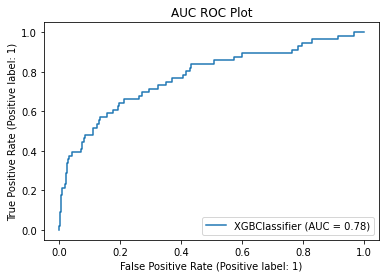

In [45]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

# auc roc plot
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(x_train, y_train)

pred = clf.predict(x_test)
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       312
           1       0.67      0.36      0.47        56

    accuracy                           0.88       368
   macro avg       0.78      0.66      0.70       368
weighted avg       0.86      0.88      0.86       368



Final Accuracy is 88% and AUC score is 78%, which is very good.

In [47]:
# Saving the Model

import joblib
joblib.dump(clf, "IBM_HR_ATTRITION_ANALYSIS.pkl")

['IBM_HR_ATTRITION_ANALYSIS.pkl']